# **Comparando modelos em dataset de churn**

Durante o estudo da ciência de dados nos vemos com inúmeros tipos de modelos e diferentes ténicas. Este projeto visa comparar algumas ténicas de "Machine Learning clássicas" analisando seus resultados e observando custo computacional entre outros aspectos.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analisando o dataset e suas variaveis

Balanceamento, dados faltantes, dataprepr, entre outros

In [4]:
df = pd.read_csv('/content/drive/My Drive/dados_projetos/churn/customer_churn_dataset-training-master.csv')

In [5]:
df.tail()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [6]:
df.Churn.value_counts()

,count
Churn,
1.0,249999
0.0,190833


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
# Verificar valores ausentes
print(df.isnull().sum())


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [10]:
# Remover linhas com valores ausentes nas colunas 'Churn' e 'CustomerID'
df = df.dropna(subset=['Churn', 'CustomerID','Age','Gender','Tenure','Support Calls','Payment Delay','Subscription Type','Contract Length','Total Spend','Last Interaction'])

# Verificar novamente se há valores ausentes
print(df.isnull().sum())


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


# Possíveis tendências e análises das variáveis

1. **Tenure (Duração de Contrato)**:
Esta variável mede o tempo que o cliente permaneceu com o serviço. Em muitos casos, clientes com contratos mais longos são menos propensos a churnar, enquanto clientes com contratos mais curtos podem estar mais inclinados a cancelar o serviço. **Em outras palavras**: Clientes novos tendem a churnar com mais frequência se não estiverem satisfeitos no início do serviço. Clientes antigos, ao contrário, tendem a permanecer, desde que estejam habituados ao serviço.

2. **Usage Frequency (Frequência de Uso)**:
A frequência de uso do serviço pode ser um forte indicador de engajamento. Clientes que usam o serviço com mais frequência tendem a estar mais envolvidos e podem, têm menos probabilidade de churnar. Baixa frequência pode ser um alerta de insatisfação. **Em outras palavras**: Uma frequência de uso baixa pode ser um possível sinal de churn, já que clientes que não usam o serviço com certa regularidade podem não ver sentido em continuar com ele.

3. **Support Calls (Chamadas de Suporte)**:
O número de chamadas de suporte pode refletir o nível de frustração do cliente com o serviço. Um alto número de chamadas de suporte pode indicar insatisfação, e clientes insatisfeitos têm maior probabilidade de churnar. **Em outras palavras**: Se um cliente faz muitas chamadas para o suporte, isso pode indicar problemas não resolvidos que levam ao cancelamento.

4. **Payment Delay (Atraso no Pagamento)**:
Atrasos no pagamento podem indicar que o cliente está tendo problemas com o serviço ou com o pagamento, e pode estar se preparando para cancelar. Esta variável pode servir como um sinal de alerta de churn iminente. **Em outras palavras**: Clientes que estão com pagamentos em atraso são mais propensos a churnar, pois podem estar menos comprometidos com o serviço.

5. **Total Spend (Gasto Total)**:
O gasto total pode refletir o nível de uso do serviço. Clientes que gastam mais com o serviço podem estar mais envolvidos e, provavelmente menos propensos a cancelar. Por outro lado, clientes que gastam pouco podem estar mais predispostos a churnar. **Em outras palavras**: Um gasto baixo pode indicar que o cliente está utilizando menos serviços e, portanto, pode estar considerando cancelar.

6. **Subscription Type (Tipo de Assinatura)**:
Diferentes tipos de assinaturas podem ter diferentes níveis de retenção. Clientes com planos "Premium" ou "Standard" podem ver mais valor e serem menos propensos a churnar do que aqueles com planos "Básicos". **Em outras palavras**: O tipo de assinatura pode indicar o engajamento do cliente. Assinaturas mais caras ou de maior duração podem estar relacionadas com maior retenção.

7. **Contract Length (Duração do Contrato)**:
A duração do contrato pode influenciar o churn. Clientes com contratos mensais podem ter maior flexibilidade para cancelar em comparação com clientes que têm contratos anuais ou trimestrais. **Em outras palavras**: Contratos mais curtos, como mensais, podem indicar uma maior propensão ao churn, pois existe menos comprometimento (falta fidelidade).

8. **Last Interaction (Última Interação)**:
Clientes que não interagem com o serviço há muito tempo podem estar em risco de churn. A falta de interação pode indicar que o cliente está perdendo interesse no serviço. **Em outras palavras**: Se o cliente não interage há muito tempo, isso pode ser um indicativo de que ele está considerando abandonar o serviço.

##Análise gráfica

<ipython-input-11-ecb4e51f9960>:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para que não sobreponha o título
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


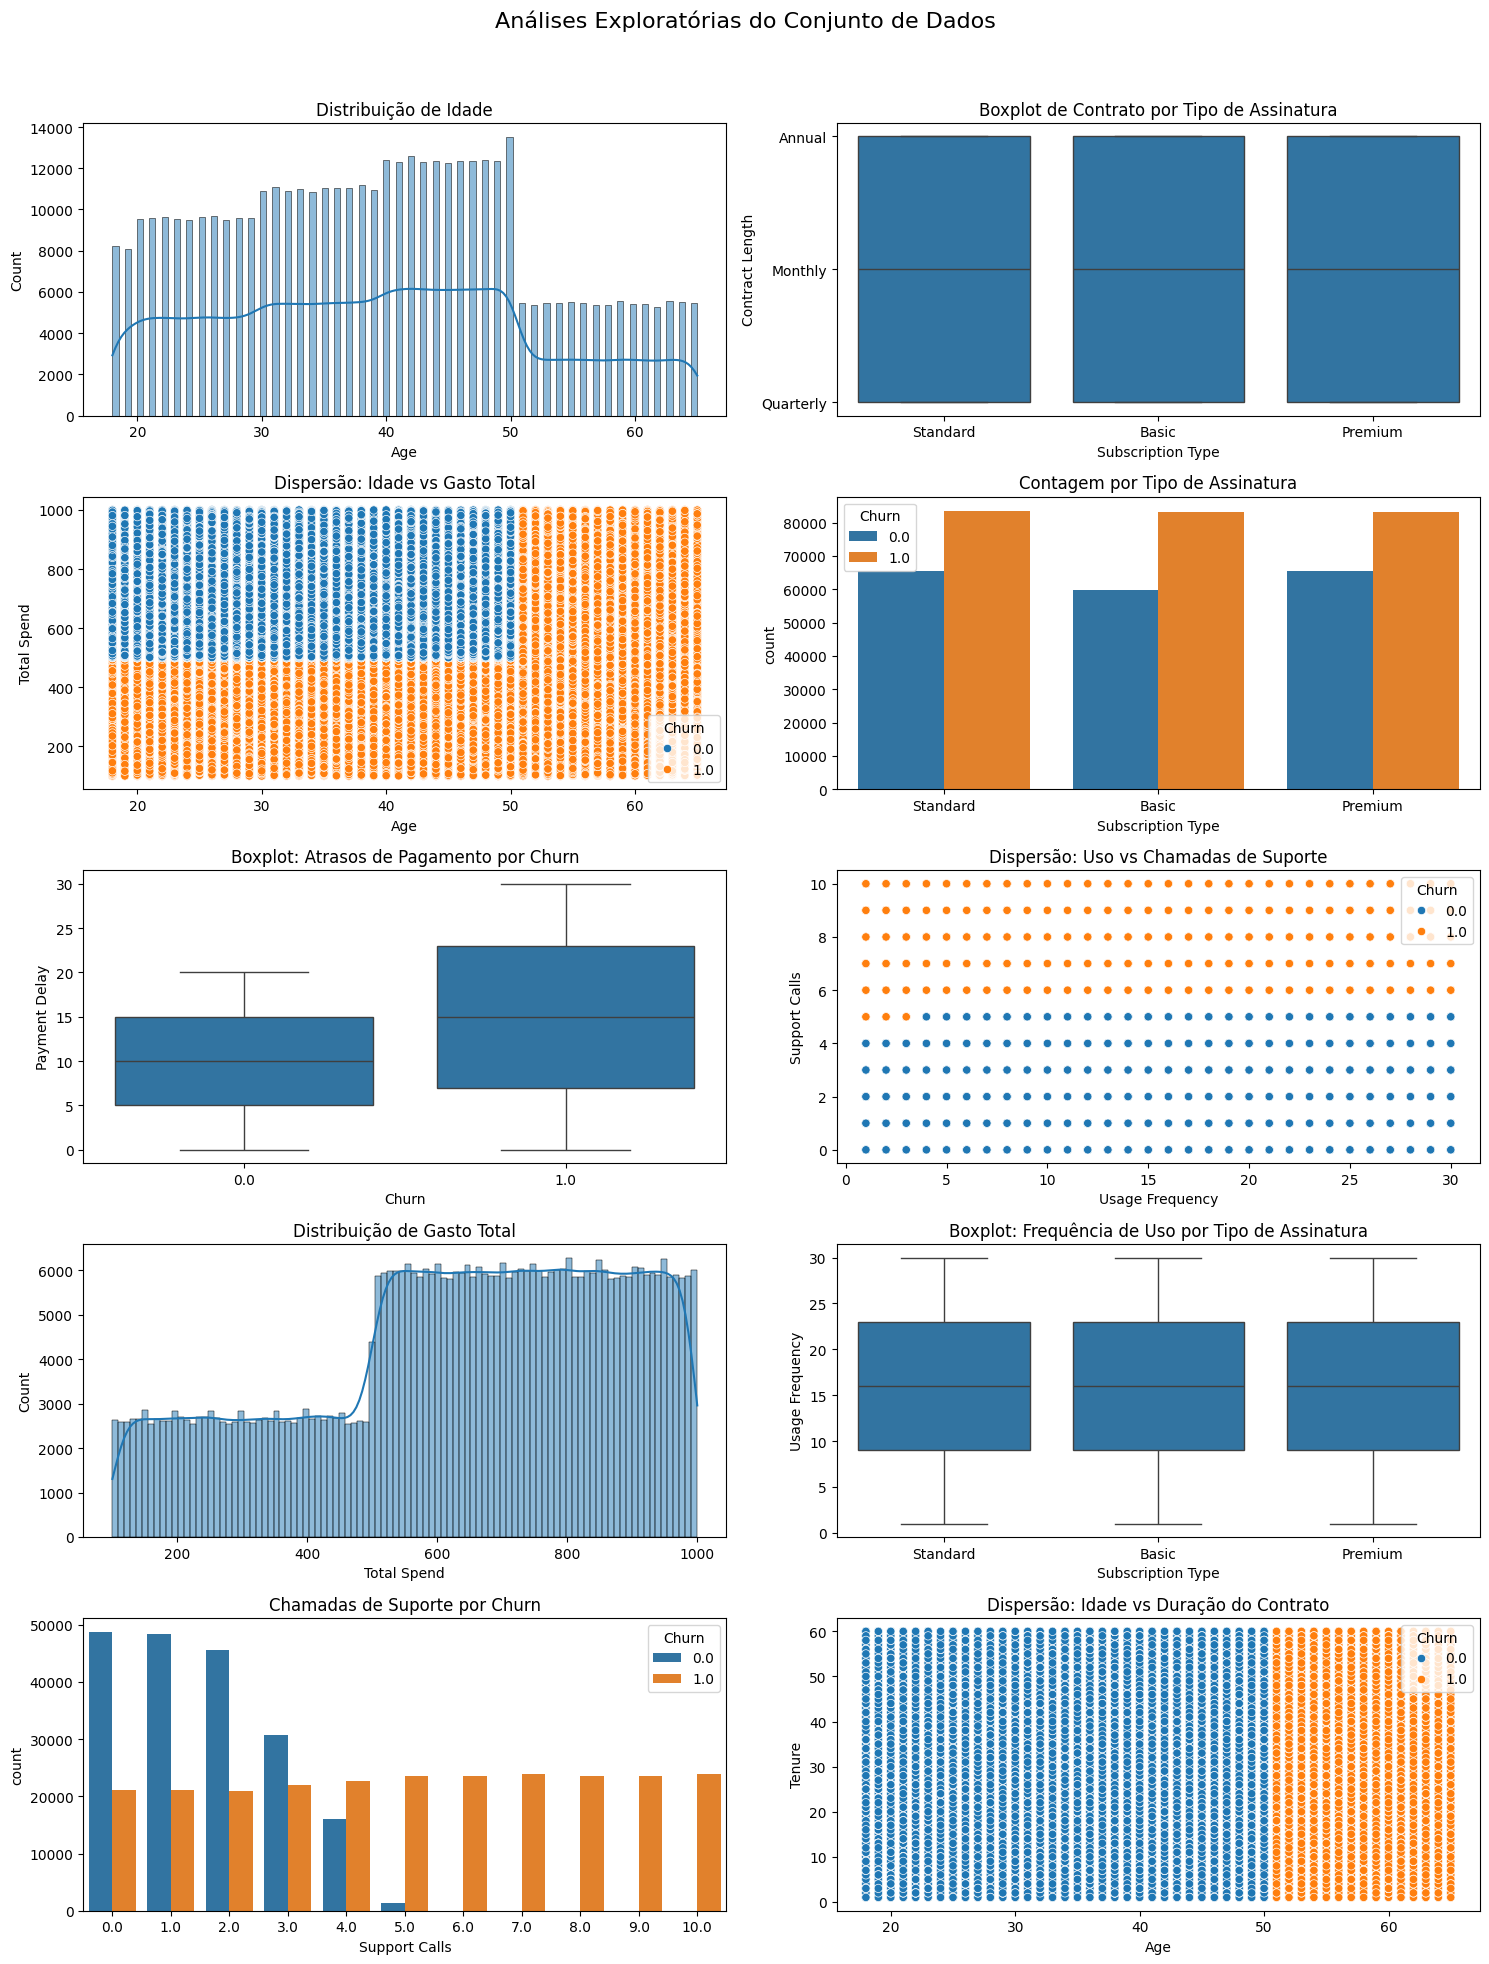

In [11]:
# Criar a figura e os eixos (5 linhas, 2 colunas)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Análises Exploratórias do Conjunto de Dados', fontsize=16)

# Gráfico 1: Distribuição de Idade
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Idade')

# Gráfico 2: Boxplot da Duração de Contrato por Tipo de Assinatura
sns.boxplot(x='Subscription Type', y='Contract Length', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Contrato por Tipo de Assinatura')

# Gráfico 3: Gráfico de Dispersão (Idade x Gasto Total)
sns.scatterplot(x='Age', y='Total Spend', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Dispersão: Idade vs Gasto Total')

# Gráfico 4: Contagem de Tipos de Assinatura
sns.countplot(x='Subscription Type', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Contagem por Tipo de Assinatura')

# Gráfico 5: Boxplot de Atrasos de Pagamento por Churn
sns.boxplot(x='Churn', y='Payment Delay', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Boxplot: Atrasos de Pagamento por Churn')

# Gráfico 6: Gráfico de Dispersão (Uso x Interações com Suporte)
sns.scatterplot(x='Usage Frequency', y='Support Calls', hue='Churn', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Dispersão: Uso vs Chamadas de Suporte')

# Gráfico 7: Distribuição do Gasto Total
sns.histplot(df['Total Spend'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribuição de Gasto Total')

# Gráfico 8: Boxplot de Frequência de Uso por Tipo de Assinatura
sns.boxplot(x='Subscription Type', y='Usage Frequency', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Boxplot: Frequência de Uso por Tipo de Assinatura')

# Gráfico 9: Contagem de Chamadas de Suporte por Churn
sns.countplot(x='Support Calls', hue='Churn', data=df, ax=axes[4, 0])
axes[4, 0].set_title('Chamadas de Suporte por Churn')

# Gráfico 10: Gráfico de Dispersão (Idade x Duração do Contrato)
sns.scatterplot(x='Age', y='Tenure', hue='Churn', data=df, ax=axes[4, 1])
axes[4, 1].set_title('Dispersão: Idade vs Duração do Contrato')

# Ajustar o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para que não sobreponha o título
plt.show()


A partir das análises exploratórias gráficas podemos concluir que aparentemente Idade, chamadas de suporte e atrasos de pagamento aparentam ter grande impacto nas variáveis de churn. Gasto total também tem sua importância, pelo menos até certa idade.

## Importando modelos e preparando dados para modelar

In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [13]:
# Preprocessamento
# Converter variáveis categóricas e preparar transformações
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']


In [14]:
# Definir o pré-processamento para colunas numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])


In [15]:
# Separar features e target
X = df.drop(columns=['CustomerID', 'Churn'])  # Remover ID e a variável alvo
y = df['Churn']


In [16]:
# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
# Funções de métrica
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [18]:
# Lista para armazenar os resultados de todos os modelos
results = []


# Iniciando treinamento dos modelos

Pipeline com **Naive Bayes** - modelo simples base estatistica

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Criar pipeline para Naive Bayes
pipeline_nb = Pipeline(steps=[('preprocessor', preprocessor), ('model', GaussianNB())])

# Avaliar o modelo
accuracy = cross_val_score(pipeline_nb, X, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(pipeline_nb, X, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(pipeline_nb, X, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(pipeline_nb, X, y, cv=kf, scoring=scoring['f1']).mean()

# Armazenar resultados
results.append({
    'Model': 'Naive Bayes',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})



Pipeline com **Regressão Logística** - modelo simples base estatistica

In [20]:
from sklearn.linear_model import LogisticRegression

# Pipeline para Logistic Regression
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())])

# Avaliar o modelo
accuracy = cross_val_score(pipeline_lr, X, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(pipeline_lr, X, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(pipeline_lr, X, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(pipeline_lr, X, y, cv=kf, scoring=scoring['f1']).mean()

# Armazenar resultados
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})




Pipeline com **K-NN** - modelo com base em distancias

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline para K-NN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsClassifier())])

# Avaliar o modelo
accuracy = cross_val_score(pipeline_knn, X, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(pipeline_knn, X, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(pipeline_knn, X, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(pipeline_knn, X, y, cv=kf, scoring=scoring['f1']).mean()

# Armazenar resultados
results.append({
    'Model': 'K-NN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})


Pipeline com **Randon Forest** - ténica ensemble de bagging

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline para Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())])

# Avaliar o modelo
accuracy = cross_val_score(pipeline_rf, X, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(pipeline_rf, X, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(pipeline_rf, X, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(pipeline_rf, X, y, cv=kf, scoring=scoring['f1']).mean()

# Armazenar resultados
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})


Pipeline com **LightGBM** - técnica ensemble de boosting

In [23]:
from lightgbm import LGBMClassifier

# Pipeline para LightGBM
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('model', LGBMClassifier())])

# Avaliar o modelo
accuracy = cross_val_score(pipeline_lgbm, X, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(pipeline_lgbm, X, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(pipeline_lgbm, X, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(pipeline_lgbm, X, y, cv=kf, scoring=scoring['f1']).mean()

# Armazenar resultados
results.append({
    'Model': 'LightGBM',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})


[LightGBM] [Info] Number of positive: 199895, number of negative: 152770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566813 -> initscore=0.268859
[LightGBM] [Info] Start training from score 0.268859
[LightGBM] [Info] Number of positive: 200091, number of negative: 152574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 15
[LightGBM] [Info

## Comparando métricas de avaliação

In [24]:
import pandas as pd

# Converter a lista de resultados em um DataFrame
results_df = pd.DataFrame(results)

# Exibir os resultados
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.768991,1.000000,0.592652,0.744232
1,Logistic Regression,0.895361,0.925178,0.887243,0.905812
2,K-NN,0.960032,0.998225,0.931179,0.963537
3,Random Forest,0.999222,0.999976,0.998740,0.999298
4,LightGBM,0.999805,0.999936,0.999720,0.999828


### Métricas de avaliação:

Acurácia: Mede o desempenho geral do modelo.

Precisão: Mede a exatidão das previsões de churn.

Recall: Mede quantos churns reais foram capturados pelo modelo.

F1 Score: O equilíbrio entre precisão e recall, importante para problemas de churn.

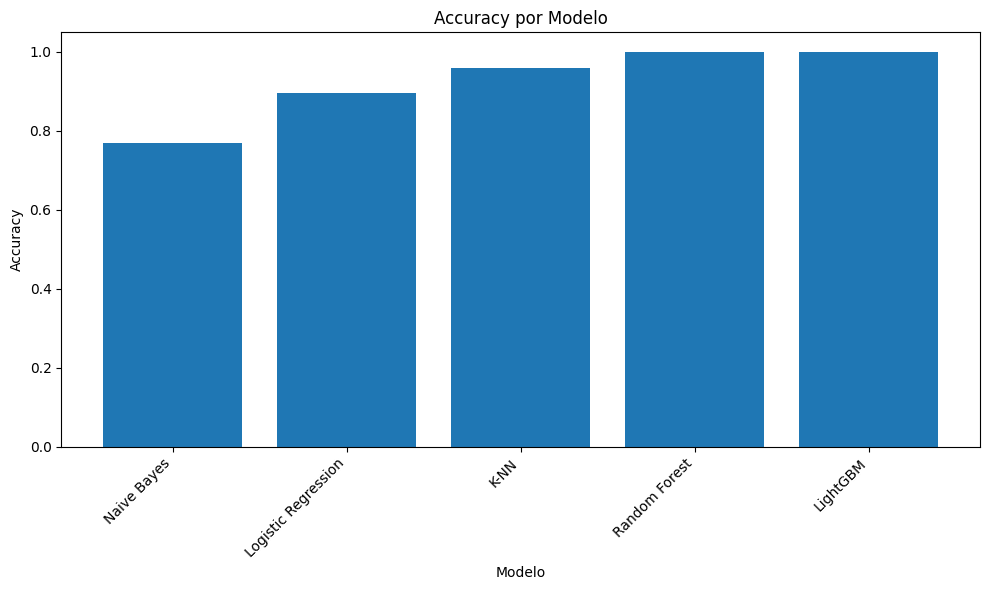

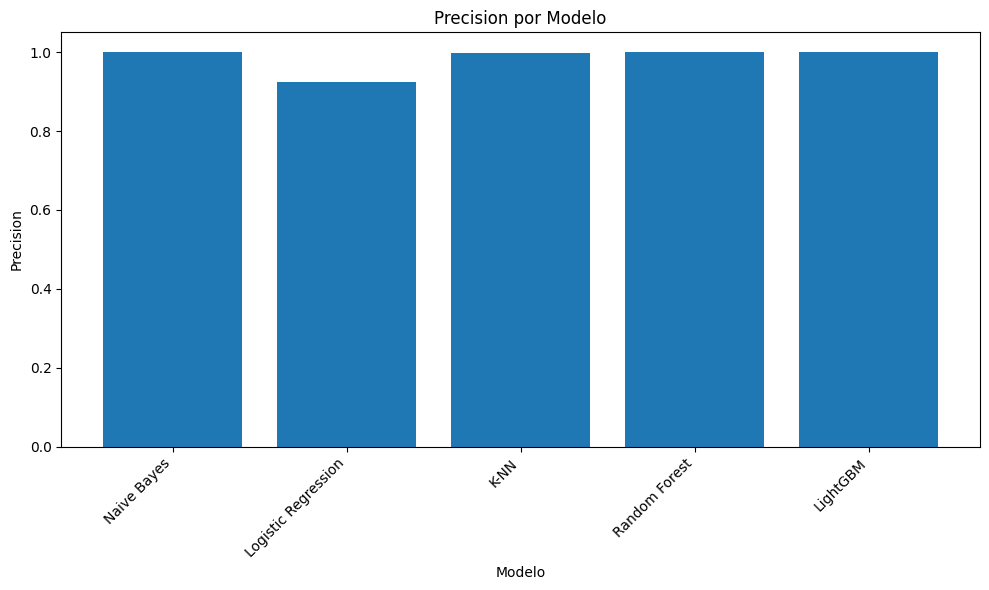

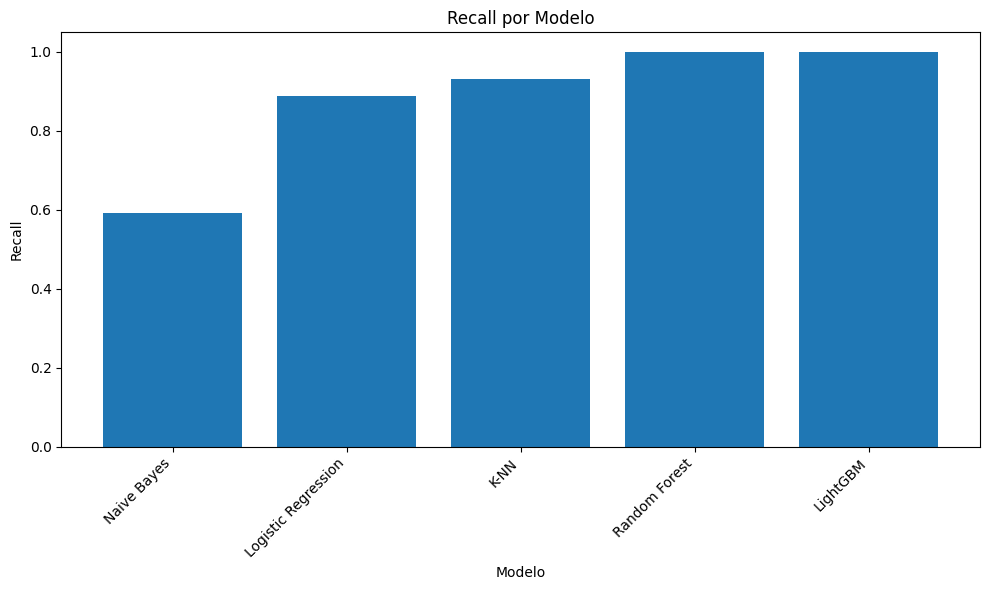

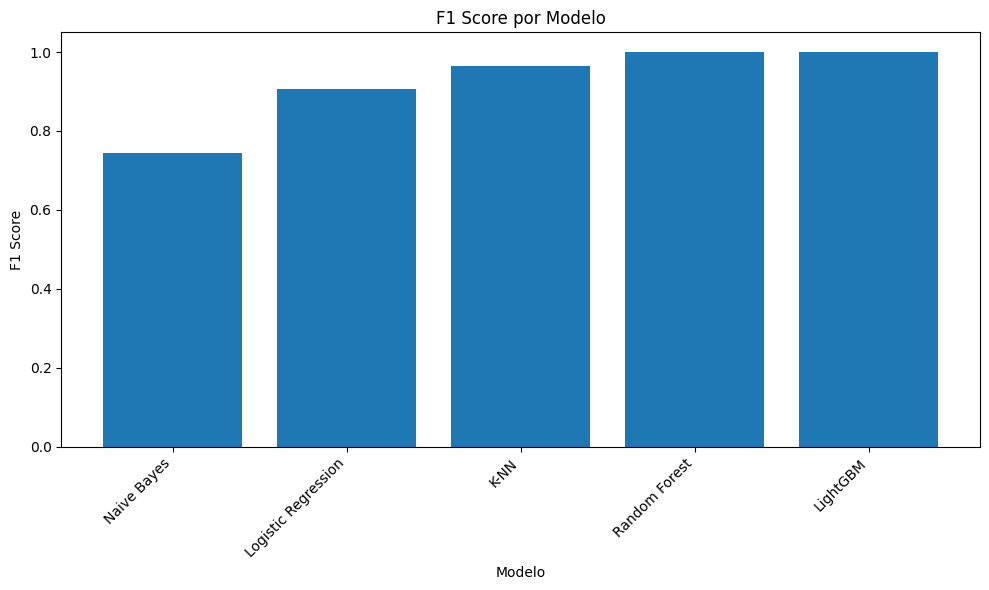

In [25]:

import matplotlib.pyplot as plt

# Criar um gráfico para cada coluna do DataFrame de resultados
for column in results_df.columns[1:]:
  plt.figure(figsize=(10, 6))
  plt.bar(results_df['Model'], results_df[column])
  plt.title(f'{column} por Modelo')
  plt.xlabel('Modelo')
  plt.ylabel(column)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


# **Parecer das análises**


### **Comparação Geral de Desempenho**:

**LightGBM** e **Random Forest** se destacam com uma acurácia extremamente alta (acima de 99%), superando todos os outros modelos. LightGBM e Random Forest tiveram os maiores F1 scores (99,98% e 99,93%, respectivamente), indicando um equilíbrio excelente entre precisão e recall.

**Regressão Logística** apresentou uma acurácia intermediaria (89.5%), recall razoável (88.7%) e também mostrou uma boa precisão (92.5%), o que significa que é confiável ao prever churn, sendo uma escolha razoável para problemas onde interpretabilidade é um fator importante.

**K-NN** teve um desempenho um tanto superior à regressão logística e inferiror às técnicas de ensembles (acuracia 	96,00% e F1 96,35%), porém um custo computacional alto.

**Naive Bayes** obteve uma acurácia inferior (76.9%) em comparação com os outros modelos, o que pode indicar que ele não consegue capturar adequadamente as complexidades do problema, entretanto teve precisão perfeita (1.0), o que significa que, quando prevê um churn, ele raramente erra. Contudo, como o recall foi baixo (59.3%), isso indica que o Naive Bayes está prevendo apenas uma pequena parte dos churns corretos (talvez focando em casos óbvios)..


### **Conclusões Práticas:**

Para este estudo o **LightGBM** parece ser o modelo mais eficiente em todos os aspectos, com um desempenho quase perfeito em todas as métricas. É altamente recomendável para cenários onde a precisão e o recall são fundamentais.

**Random Forest** também é uma excelente escolha, com resultados muito próximos aos do LightGBM, oferecendo alta precisão e recall, além de ser fácil de interpretar, e ambos obtiveram baixo custo computacional.

**K-NN** teve um desempenho bom, mas foi menos eficiente em termos de tempo de execução.

**Regressão Logística** oferece um desempenho consistente e pode ser uma boa escolha para cenários onde a interpretabilidade é mais importante que a precisão absoluta.

**Naive Bayes** teve um desempenho inferior comparado aos outros modelos e provavelmente não é a melhor escolha para este problema, especialmente se você precisa capturar todos os churns.

**Obs**: Tentei utilizar também o SVM para comparação porém o custo computacional foi muito alto, mesmo alterando o kernel, então resolvi descartar neste estudo.



**Sobre o conjunto de dados**

A rotatividade de clientes se refere ao fenômeno em que os clientes descontinuam seu relacionamento ou assinatura com uma empresa ou provedor de serviços. Ela representa a taxa na qual os clientes param de usar os produtos ou serviços de uma empresa dentro de um período específico. A rotatividade é uma métrica importante para as empresas, pois impacta diretamente a receita, o crescimento e a retenção de clientes.

No contexto do conjunto de dados Churn, o rótulo churn indica se um cliente abandonou ou não. Um cliente abandonado é aquele que decidiu descontinuar sua assinatura ou uso dos serviços da empresa. Por outro lado, um cliente não abandonado é aquele que continua engajado e mantém seu relacionamento com a empresa.

Entender a rotatividade de clientes é crucial para que as empresas identifiquem padrões, fatores e indicadores que contribuem para o desgaste do cliente. Ao analisar o comportamento de rotatividade e seus recursos associados, as empresas podem desenvolver estratégias para reter clientes existentes, melhorar a satisfação do cliente e reduzir a rotatividade de clientes. Técnicas de modelagem preditiva também podem ser aplicadas para prever e abordar proativamente a rotatividade potencial, permitindo que as empresas tomem medidas proativas para reter clientes em risco.

Como não tínhamos muitos metadados partimos para Possíveis tendências e análises das variáveis, análise exploratória e modelos na prática.

fonte: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data

#Verificando a importancia das variaveis para cada modelo: Bagging x Boosting

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058


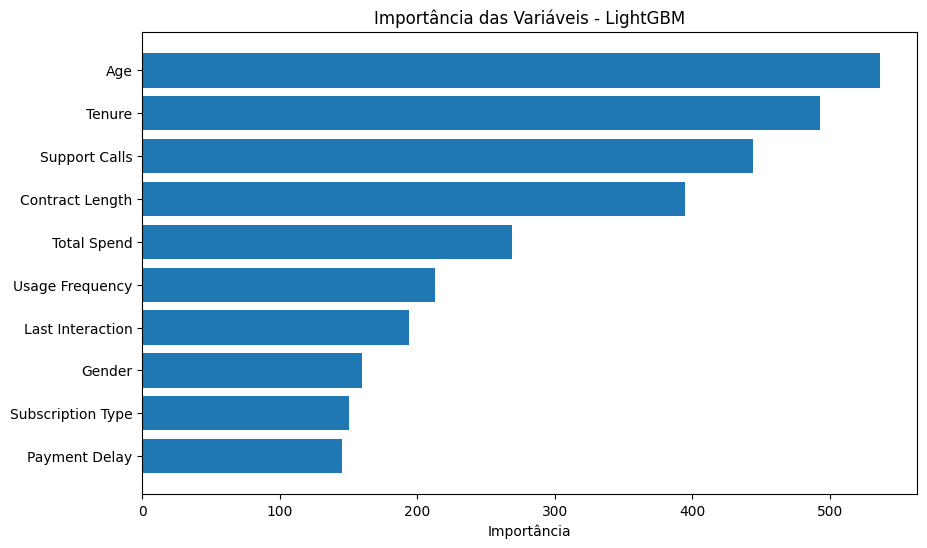

In [26]:
import lightgbm as lgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through columns with 'object' dtype and encode them
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Treinar o modelo LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X, y)

# Calcular a importância das features
importances = lgb_model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis - LightGBM')
plt.gca().invert_yaxis()  # Inverter o eixo para as mais importantes aparecerem no topo
plt.show()


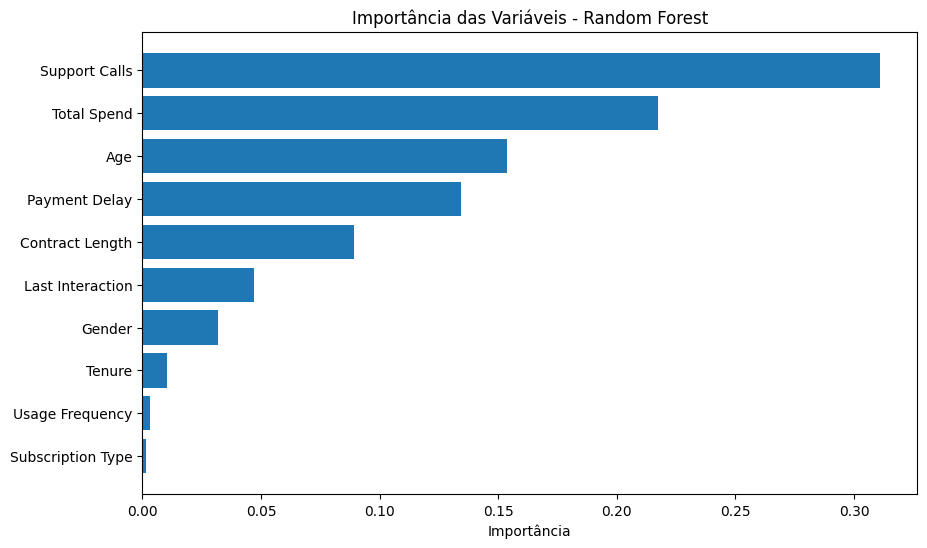

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd


# Pré-processamento: converter variáveis categóricas
X = pd.get_dummies(X)

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Calcular a importância das features
importances = rf_model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()  # Inverter o eixo para as mais importantes aparecerem no topo
plt.show()


#**Analisando se com ajustes conseguimos melhorar modelos mais simples - Naive Bayes E Regressão Logística**

## **Naive Bayes**

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

df_new = df


In [29]:
# Discretizar variáveis contínuas como 'Age' e 'Total Spend'
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_new['Age_group'] = discretizer.fit_transform(df_new[['Age']])
df_new['Spend_group'] = discretizer.fit_transform(df_new[['Total Spend']])




In [30]:
# Definir as features (X) e o alvo (y)
X = df_new.drop(columns=['CustomerID', 'Churn', 'Age', 'Total Spend'])  # Removendo as variáveis originais
X = pd.get_dummies(X)  # Converter variáveis categóricas
y = df_new['Churn']



In [31]:
# Normalizar os dados para o Naive Bayes
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [32]:
# Treinar Multinomial Naive Bayes
nb_model = MultinomialNB()

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Funções de métrica
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Avaliar as métricas de Multinomial Naive Bayes
accuracy = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Multinomial Naive Bayes\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Multinomial Naive Bayes
Accuracy: 0.8290369094581654
Precision: 0.8862154774431662
Recall: 0.8014345746248346
F1 Score: 0.8416950194381443


Estamos tentando o Multinomial Naive Bayes em vez do Gaussian, porque os dados podem ter mais natureza categórica ou de contagem.
As variáveis contínuas, como Age e Total Spend, foram discretizadas em grupos (bins) para que o Naive Bayes lide melhor com elas.
Normalização foi aplicada para que os dados fiquem no intervalo de 0 a 1, o que é necessário para o Multinomial Naive Bayes.

Tais ajustes trouxeram uma melhora considerável no recall e conseguequentemente no F1, o que demonstra ser uma questão de natureza dos dados para melhor ajuste do modelo. por ser simples e leve ainda traz um resultado considerável.

## **Regressão Logística - testando diferentes técnicas para buscar otimização**

tentativa via **GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir grid de hiperparâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']  # Testar regularização L1 e L2
}

# Grid Search para Regressão Logística
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_search.fit(X_scaled, y)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_lr_model = grid_search.best_estimator_
accuracy = cross_val_score(best_lr_model, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(best_lr_model, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(best_lr_model, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(best_lr_model, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (After Grid Search)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")



Melhores hiperparâmetros: {'C': 100, 'penalty': 'l2'}
Logistic Regression (After Grid Search)
Accuracy: 0.8948737805068548
Precision: 0.940368863328741
Recall: 0.8697825388876332
F1 Score: 0.9036983812880732


**Seleção de melhores features**


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar as melhores features
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# Treinar o modelo após a seleção de features
lr_model_selected = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')
lr_model_selected.fit(X_selected, y)

# Avaliar o modelo após a seleção de features
accuracy = cross_val_score(lr_model_selected, X_selected, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model_selected, X_selected, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model_selected, X_selected, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model_selected, X_selected, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (Feature Selection)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Feature Selection)
Accuracy: 0.88833614506076
Precision: 0.9385163845913252
Recall: 0.8593979468880896
F1 Score: 0.8972156218238071


Testar diferentes **solvers**

In [35]:
# Testar diferentes solvers
for solver in ['liblinear', 'lbfgs', 'saga', 'newton-cg']:
    lr_model_solver = LogisticRegression(solver=solver, penalty='l2', class_weight='balanced')
    lr_model_solver.fit(X_scaled, y)

    # Avaliar o modelo
    accuracy = cross_val_score(lr_model_solver, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
    precision = cross_val_score(lr_model_solver, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
    recall = cross_val_score(lr_model_solver, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
    f1 = cross_val_score(lr_model_solver, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

    print(f"Logistic Regression (Solver={solver})\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Solver=liblinear)
Accuracy: 0.8948760489292805
Precision: 0.9404149165958138
Recall: 0.8697385293205944
F1 Score: 0.9036958577599968
Logistic Regression (Solver=lbfgs)
Accuracy: 0.8949010017046074
Precision: 0.9404405124465939
Recall: 0.8697585324736942
F1 Score: 0.9037185215186586
Logistic Regression (Solver=saga)
Accuracy: 0.8948783173517061
Precision: 0.9404189961518401
Recall: 0.8697385293205944
F1 Score: 0.9036977369283823
Logistic Regression (Solver=newton-cg)
Accuracy: 0.8948873911185956
Precision: 0.9404314747058967
Recall: 0.8697425393456569
F1 Score: 0.9037056620826356


**Aplicar a transformação logarítmica em variáveis contínuas positivas**

In [36]:
import numpy as np

# Aplicar a transformação logarítmica em variáveis contínuas positivas
df_new['Log_Total_Spend'] = np.log1p(df_new['Total Spend'])  # log1p(x) = log(1 + x)
df_new['Log_Age'] = np.log1p(df_new['Age'])

# Atualizar X com as novas variáveis transformadas
X = df_new.drop(columns=['CustomerID', 'Churn', 'Total Spend', 'Age'])
X = pd.get_dummies(X)

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinar a Regressão Logística
lr_model = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')
lr_model.fit(X_scaled, y)

# Avaliar as métricas
accuracy = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (Log Transformed)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Log Transformed)
Accuracy: 0.9094893272843658
Precision: 0.9530387277858235
Recall: 0.883958581304312
F1 Score: 0.9171977683829619


**Aplicar transformação de Box-Cox nas variáveis contínuas**

In [37]:
from scipy import stats

# Aplicar transformação de Box-Cox nas variáveis contínuas (que devem ser positivas)
df_new['BoxCox_Total_Spend'], _ = stats.boxcox(df_new['Total Spend'] + 1)  # Box-Cox requer valores positivos
df_new['BoxCox_Age'], _ = stats.boxcox(df_new['Age'] + 1)

# Atualizar X com as novas variáveis transformadas
X = df_new.drop(columns=['CustomerID', 'Churn', 'Total Spend', 'Age'])
X = pd.get_dummies(X)

# Escalar os dados
X_scaled = scaler.fit_transform(X)

# Treinar a Regressão Logística
lr_model = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')
lr_model.fit(X_scaled, y)

# Avaliar as métricas
accuracy = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (Box-Cox Transformed)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Box-Cox Transformed)
Accuracy: 0.9295808854457117
Precision: 0.9667117587176062
Recall: 0.9070637788762793
F1 Score: 0.9359364866697104


**Criar interações de segundo grau**

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Criar interações de segundo grau (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Treinar a Regressão Logística com interações
lr_model_poly = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')
lr_model_poly.fit(X_poly, y)

# Avaliar as métricas
accuracy = cross_val_score(lr_model_poly, X_poly, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model_poly, X_poly, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model_poly, X_poly, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model_poly, X_poly, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (Feature Interactions)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Feature Interactions)
Accuracy: 0.9630652954913224
Precision: 0.9854284084873852
Recall: 0.9489042753534738
F1 Score: 0.9668208969404356


**utilizar ElasticNet que combina L1 e L2**

In [39]:
# ElasticNet combina L1 e L2
lr_model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight='balanced')

# Treinar e avaliar o modelo
accuracy = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

print(f"Logistic Regression (ElasticNet)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (ElasticNet)
Accuracy: 0.9295899593927043
Precision: 0.9665213077421235
Recall: 0.907271793183438
F1 Score: 0.9359578755471831


**transformação Box-Cox + ElasticNet**

In [40]:
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Aplicar transformação Box-Cox nas variáveis contínuas
# Box-Cox só funciona com valores positivos, então adicionamos +1 para garantir isso
df_new['BoxCox_Total_Spend'], _ = stats.boxcox(df_new['Total Spend'] + 1)
df_new['BoxCox_Age'], _ = stats.boxcox(df_new['Age'] + 1)

# Atualizar as features X, removendo as originais e mantendo as transformadas
X = df_new.drop(columns=['CustomerID', 'Churn', 'Total Spend', 'Age'])
X = pd.get_dummies(X)  # Codificar variáveis categóricas como dummies

# Escalar os dados (padrão para regressão logística com regularização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir o alvo (y)
y = df_new['Churn']

# Configurar validação cruzada com K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir as métricas de avaliação
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Aplicar Regressão Logística com ElasticNet (combinação de L1 e L2)
lr_model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight='balanced', max_iter=10000)

# Avaliar o modelo com as métricas desejadas
accuracy = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['accuracy']).mean()
precision = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['precision']).mean()
recall = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['recall']).mean()
f1 = cross_val_score(lr_model_elastic, X_scaled, y, cv=kf, scoring=scoring['f1']).mean()

# Exibir os resultados
print(f"Logistic Regression (Box-Cox + ElasticNet)\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Logistic Regression (Box-Cox + ElasticNet)
Accuracy: 0.9295899593927043
Precision: 0.9665213077421235
Recall: 0.907271793183438
F1 Score: 0.9359578755471831


Após utilização de comparação via inúmeras técnicas, a que se mostrou melhor adaptação à regressão logística foi a transformação polinomial pois ela cria novas features ao elevar as features existentes a uma determinada potência e/ou multiplicando features entre si. Esse processo permite que um modelo linear (como a Regressão Logística) capture relações não lineares entre as variáveis, entretando aumenta o custo computacional e pode levar ao overfit. obteve F1 de 96,68%.

A segunda melhor opção, que foi muito bem também foi a regularização elasticnet tendo resultados bem interessantes e mantendo de certa forma grande parte da simplicidade do modelo e sua interpretabilidade. F1 de 93,59%

Embora bastante melhorados nenhum dos resultados superou o LightGBM que além de ter resultado em quase tudo ótimo (99,98% de F1 por exemplo), teve um custo computacional bem atrativo.